# Project 2
## Step 1: Exploring your data.

##### Load your data in using Pandas and start to explore. Save all of your early exploration code here and include in your final submission.

In [1]:
# Numeric and statistics packages:
import numpy as np
import scipy.stats as stats

# Pandas handles dataset loading and manipulation:
import pandas as pd

# import the plotting functions:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.plotly as py
import plotly.graph_objs as go

# Setup matplotlib to display in notebook:
%matplotlib inline

In [2]:
billboard = pd.read_csv('../assets/billboard.csv')

billboard.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
billboard.shape

(317, 83)

In [4]:
billboard.dtypes.head(10)

year                 int64
artist.inverted     object
track               object
time                object
genre               object
date.entered        object
date.peaked         object
x1st.week            int64
x2nd.week          float64
x3rd.week          float64
dtype: object

In [5]:
billboard.columns

Index([u'year', u'artist.inverted', u'track', u'time', u'genre',
       u'date.entered', u'date.peaked', u'x1st.week', u'x2nd.week',
       u'x3rd.week', u'x4th.week', u'x5th.week', u'x6th.week', u'x7th.week',
       u'x8th.week', u'x9th.week', u'x10th.week', u'x11th.week', u'x12th.week',
       u'x13th.week', u'x14th.week', u'x15th.week', u'x16th.week',
       u'x17th.week', u'x18th.week', u'x19th.week', u'x20th.week',
       u'x21st.week', u'x22nd.week', u'x23rd.week', u'x24th.week',
       u'x25th.week', u'x26th.week', u'x27th.week', u'x28th.week',
       u'x29th.week', u'x30th.week', u'x31st.week', u'x32nd.week',
       u'x33rd.week', u'x34th.week', u'x35th.week', u'x36th.week',
       u'x37th.week', u'x38th.week', u'x39th.week', u'x40th.week',
       u'x41st.week', u'x42nd.week', u'x43rd.week', u'x44th.week',
       u'x45th.week', u'x46th.week', u'x47th.week', u'x48th.week',
       u'x49th.week', u'x50th.week', u'x51st.week', u'x52nd.week',
       u'x53rd.week', u'x54th.week', u'x

In [6]:
billboard.year.value_counts()

2000    317
Name: year, dtype: int64

In [7]:
billboard.iloc[:,1:7].describe()

,artist.inverted,track,time,genre,date.entered,date.peaked
count,317,317,317,317,317,317
unique,228,316,126,10,68,53
top,Jay-Z,Where I Wanna Be,3:50,Rock,2000-01-29,2000-12-02
freq,5,2,9,137,11,17


In [8]:
#count number of null data points per row
billboard.iloc[:,7:].isnull().sum(axis=1).head()


0    48
1    50
2    43
3    52
4    55
dtype: int64

In [9]:
# there are 53 weeks of data to make sure that the 52 weeks of 2000 are covered
billboard.iloc[:,7:].notnull().sum(axis=1).sum()/53

100

In [10]:
billboard.genre.value_counts()

Rock           137
Country         74
Rap             58
R&B             23
Pop              9
Latin            9
Electronica      4
Gospel           1
Jazz             1
Reggae           1
Name: genre, dtype: int64

In [11]:
billboard['date.entered'].min()

'1999-06-05'

In [12]:
billboard['date.entered'].max()

'2000-12-30'

##### Write a brief description of your data, and any interesting observations you've made thus far. 

The dataset contains 317 tracks that on the billboard top 100 for the year 2000, along with the artist name, track length, genre, date entered and date peaked on the billboard. The billboard top 100 provides weekly rankings of singles based mostly on the amount of radio play. 
The dataset includes the weekly ranking for each track for each week it was on the top 100 list.
There are a few immediate observations:

* Rock tracks consist of 137 out of 317 tracks on the top 100.
* The date entered is as early june 5, 1999.   The list includes those tracks that have been on the top 100 sometimes during year 2000.
* There are 53 weeks of data to cover the 52 weeks of year 2000.



## Step 2: Clean your data.

##### Do some rudimentary cleaning. Rename any columns that are poorly named, shorten any strings that may be too long, check for missing values (and replace them if it makes sense to do so). Explain your rationale for the way you choose to "impute" the missing data.

In [13]:
# Rename artist.inverted to artist
billboard.rename(columns={'artist.inverted': 'artist'}, inplace=True)

In [14]:
#columns should not have a period in them
col_names = []
for col in billboard.columns[0:7]:
    col_2 = col.replace('.','_')
    col_names.append(col_2)   
col_names

        
# Rename week columns
week_names = ['week' + str(i+1) for i in range(76)]
col_names = col_names + week_names

billboard.columns = col_names



In [15]:
# change the data type of dates 
billboard.date_entered = pd.to_datetime(billboard.date_entered)
billboard.date_peaked = pd.to_datetime(billboard.date_peaked)

# add a wks_to_peak column to billboard
enter_to_peak = billboard.date_peaked -billboard.date_entered 
enter_to_peak = enter_to_peak.astype(int)   # in ns
w=60*60*24*7*10**9  # w is the number of ns in a week
enter_to_peak=enter_to_peak/w   # in weeks
billboard['wks_to_peak']= enter_to_peak  # add wks_to_peak column to billboard

In [17]:
# convert'time' into seconds
billboard.shape[0]
time_list = []
for row in range(billboard.shape[0]):
    secs =int(billboard.time.str.split(':')[row][0])*60+int(billboard.time.str.split(':')[row][1])
    time_list.append(secs)
billboard['time'] = time_list


In [18]:
billboard.columns

Index([u'year', u'artist', u'track', u'time', u'genre', u'date_entered',
       u'date_peaked', u'week1', u'week2', u'week3', u'week4', u'week5',
       u'week6', u'week7', u'week8', u'week9', u'week10', u'week11', u'week12',
       u'week13', u'week14', u'week15', u'week16', u'week17', u'week18',
       u'week19', u'week20', u'week21', u'week22', u'week23', u'week24',
       u'week25', u'week26', u'week27', u'week28', u'week29', u'week30',
       u'week31', u'week32', u'week33', u'week34', u'week35', u'week36',
       u'week37', u'week38', u'week39', u'week40', u'week41', u'week42',
       u'week43', u'week44', u'week45', u'week46', u'week47', u'week48',
       u'week49', u'week50', u'week51', u'week52', u'week53', u'week54',
       u'week55', u'week56', u'week57', u'week58', u'week59', u'week60',
       u'week61', u'week62', u'week63', u'week64', u'week65', u'week66',
       u'week67', u'week68', u'week69', u'week70', u'week71', u'week72',
       u'week73', u'week74', u'week75', u'we

##### Using Pandas' built in `melt` function, pivot the weekly ranking data to be long rather than wide. As a result, you will have removed the 72 'week' columns and replace it with two: Week and Ranking. There will now be multiple entries for each song, one for each week on the Billboard rankings.

In [24]:
columns = list(billboard.columns[:7]) + ['wks_to_peak']
#columns = ['year', 'artist','track','time','genre','date_entered','date_peaked','wks_to_peak']
billboard_long = pd.melt(billboard, id_vars=columns, var_name='week', \
                     value_name='rank').dropna(subset=['rank'])
billboard_long.sort_values(by=['year','artist','track'])

,year,artist,track,time,genre,date_entered,date_peaked,wks_to_peak,week,rank
246,2000,2 Pac,Baby Don't Cry (Keep Ya Head Up II),262,Rap,2000-02-26,2000-03-11,2.0,week1,87.0
563,2000,2 Pac,Baby Don't Cry (Keep Ya Head Up II),262,Rap,2000-02-26,2000-03-11,2.0,week2,82.0
880,2000,2 Pac,Baby Don't Cry (Keep Ya Head Up II),262,Rap,2000-02-26,2000-03-11,2.0,week3,72.0
1197,2000,2 Pac,Baby Don't Cry (Keep Ya Head Up II),262,Rap,2000-02-26,2000-03-11,2.0,week4,77.0
1514,2000,2 Pac,Baby Don't Cry (Keep Ya Head Up II),262,Rap,2000-02-26,2000-03-11,2.0,week5,87.0
1831,2000,2 Pac,Baby Don't Cry (Keep Ya Head Up II),262,Rap,2000-02-26,2000-03-11,2.0,week6,94.0
2148,2000,2 Pac,Baby Don't Cry (Keep Ya Head Up II),262,Rap,2000-02-26,2000-03-11,2.0,week7,99.0
287,2000,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,195,R&B,2000-09-02,2000-09-09,1.0,week1,91.0
604,2000,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,195,R&B,2000-09-02,2000-09-09,1.0,week2,87.0
921,2000,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,195,R&B,2000-09-02,2000-09-09,1.0,week3,92.0


In [26]:
billboard_long.shape

(5307, 10)

## Step 3: Visualize your data.

##### Using a plotting utility of your choice (Tableau or python modules or both), create visualizations that will provide context to your data. There is no minimum or maximum number of graphs you should generate, but there should be a clear and consistent story being told. Give insights to the distribution, statistics, and relationships of the data. 

In [84]:
rank_by_genre = pd.pivot_table(billboard_long, index=['genre'],values=['rank'],aggfunc='count')
rank_by_genre.sort_values('rank',inplace=True,ascending=False)
rank_by_genre

,rank
genre,
Rock,2587
Country,1200
Rap,837
R&B,261
Latin,173
Pop,137
Electronica,72
Gospel,20
Reggae,15


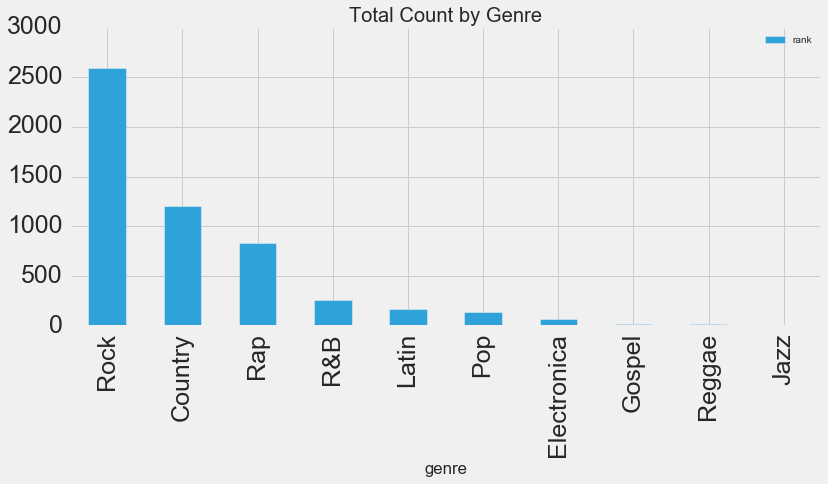

In [164]:
rank_by_genre.plot(kind='bar',fontsize=25,title='Total Count by Genre',figsize=(12,5))
plt.show()

## Rock, Country and Rap are the most popular. 

In [94]:
ave_rank_by_genre = pd.pivot_table(billboard_long, index=['genre'],values=['rank'],aggfunc=np.mean)
ave_rank_by_genre.sort_values('rank',inplace=True,ascending=True)
ave_rank_by_genre

,rank
genre,
Rock,42.206803
Latin,47.653179
Jazz,51.800000
Pop,54.963504
Rap,56.236559
Country,61.687500
Electronica,62.847222
R&B,67.632184
Gospel,67.750000


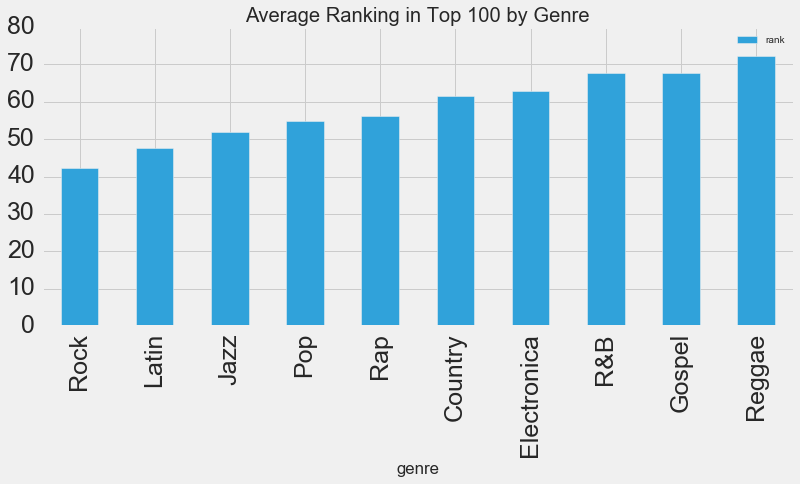

In [95]:
ave_rank_by_genre.plot(kind='bar',fontsize=25,title='Average Ranking in Top 100 by Genre',figsize=(12,5))
plt.show()

## Rock has the lowest average ranking of top 100 songs.

In [123]:
time_by_genre = pd.pivot_table(billboard_long, index=['genre'],values=['time'],aggfunc=np.mean)
time_by_genre.sort_values('time',inplace=True,ascending=True)
time_by_genre

,time
genre,
Pop,224.729927
Country,228.703333
Rap,242.556750
Rock,245.234635
Latin,249.485549
R&B,249.900383
Reggae,257.000000
Electronica,274.166667
Gospel,330.000000


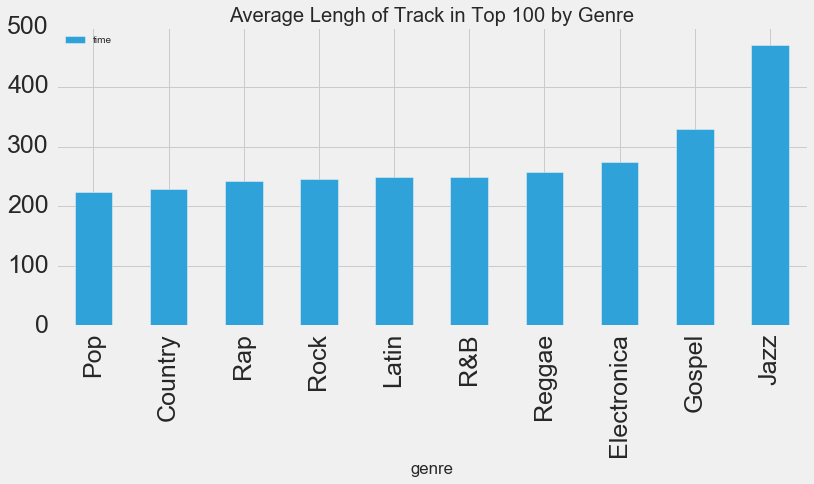

In [125]:
time_by_genre.plot(kind='bar',fontsize=25,title='Average Lengh of Track in Top 100 by Genre',figsize=(12,5))
plt.show()

## The 3 most popular genres (Rock, Country, Rap) have about the same average length of track.   There is not enough data to determine if Jazz and Gospel tracks are actually longer than the rest of the genres.

In [118]:
time_vs_rank = pd.pivot_table(billboard_long, index=['track'],values=['time','rank'],aggfunc=np.mean)
time_vs_rank.sort_values('rank',inplace=True,ascending=True)
time_vs_rank.head()

,rank,time
track,,
"Maria, Maria",10.500000,258.0
Music,13.458333,225.0
Bye Bye Bye,14.260870,195.0
Hot Boyz,14.333333,231.0
Independent Women Part I,14.821429,218.0


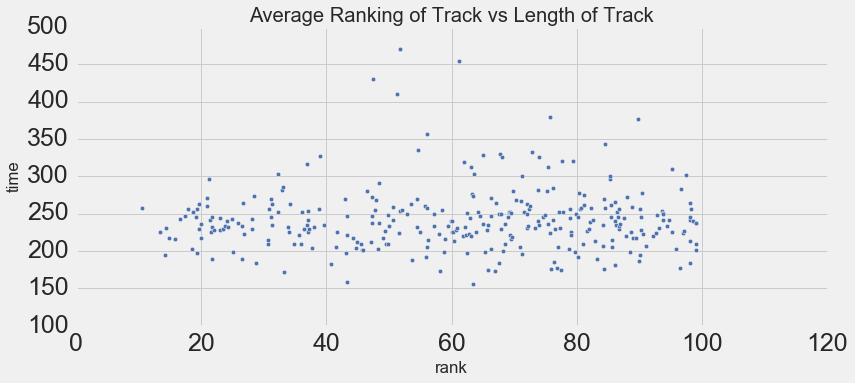

In [121]:
time_vs_rank.plot(kind='scatter',x='rank',y='time',fontsize=25,title='Average Ranking of Track vs Length of Track',figsize=(12,5))
plt.show()

## There does not seem to be any relationship between the length of track and the average ranking of the track.

In [140]:
wks_to_peak__vs__rank = pd.pivot_table(billboard_long, index=['track','genre'],values=['wks_to_peak','rank'],aggfunc=np.mean)
wks_to_peak__vs__rank.sort_values('rank',inplace=True,ascending=True)
wks_to_peak__vs__rank.head()

,,rank,wks_to_peak
track,genre,,
"Maria, Maria",Rock,10.500000,8.0
Music,Rock,13.458333,5.0
Bye Bye Bye,Rock,14.260870,11.0
Hot Boyz,Rap,14.333333,6.0
Independent Women Part I,Rock,14.821429,8.0


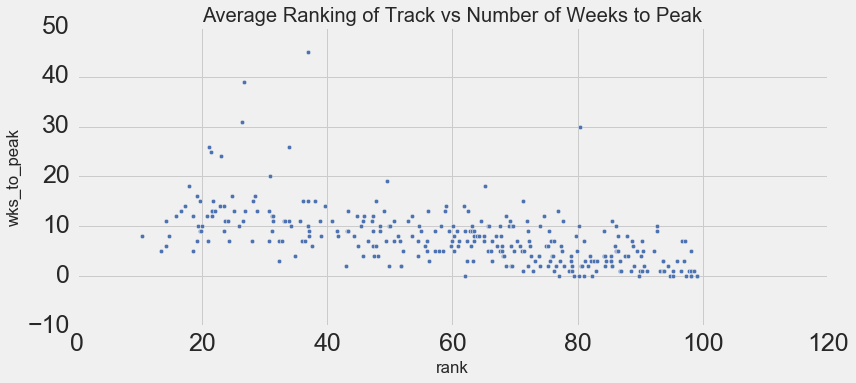

In [146]:
wks_to_peak__vs__rank.plot(kind='scatter',x='rank',y='wks_to_peak',fontsize=25,title='Average Ranking of Track vs Number of Weeks to Peak',figsize=(12,5))
plt.show()

## There seems to be a linear relationship with negative slope between the average ranking of track and the number of weeks it takes to reach the peak.

In [150]:
billboard_long_rock =billboard_long[billboard_long.genre == "Rock"]
wks_to_peak__vs__rank__ROCK = pd.pivot_table(billboard_long_rock, index=['track','genre'],values=['wks_to_peak','rank'],aggfunc=np.mean)
wks_to_peak__vs__rank__ROCK.sort_values('rank',inplace=True,ascending=True)
wks_to_peak__vs__rank__ROCK.head()

,,rank,wks_to_peak
track,genre,,
"Maria, Maria",Rock,10.500000,8.0
Music,Rock,13.458333,5.0
Bye Bye Bye,Rock,14.260870,11.0
Independent Women Part I,Rock,14.821429,8.0
Try Again,Rock,16.656250,13.0


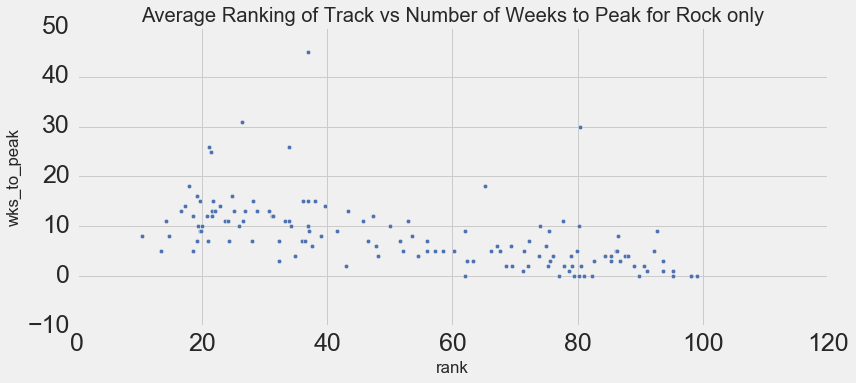

In [152]:
wks_to_peak__vs__rank__ROCK.plot(kind='scatter',x='rank',y='wks_to_peak',fontsize=25,title='Average Ranking of Track vs Number of Weeks to Peak for Rock only',figsize=(12,5))
plt.show()

## A similar linear relationship exist for the Rock genre, as expected.

In [157]:
billboard_long_ =billboard_long[billboard_long.genre !='Rock']
wks_to_peak__vs__rank__ = pd.pivot_table(billboard_long_, index=['track','genre'],values=['wks_to_peak','rank'],aggfunc=np.mean)
wks_to_peak__vs__rank__.sort_values('rank',inplace=True,ascending=True)
wks_to_peak__vs__rank__.head()

,,rank,wks_to_peak
track,genre,,
Hot Boyz,Rap,14.333333,6.0
Be With You,Latin,15.850000,12.0
Bring It All To Me,Pop,21.586207,13.0
Breathe,Rap,23.018868,24.0
You Sang To Me,Latin,23.468750,14.0


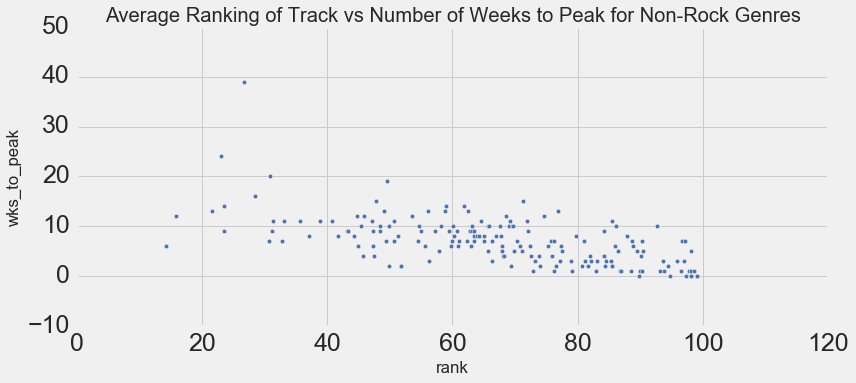

In [159]:
wks_to_peak__vs__rank__.plot(kind='scatter',x='rank',y='wks_to_peak',fontsize=25,title='Average Ranking of Track vs Number of Weeks to Peak for Non-Rock Genres',figsize=(12,5))
plt.show()

## For non-rock genres taken together the relationship is not as strong as for rock.

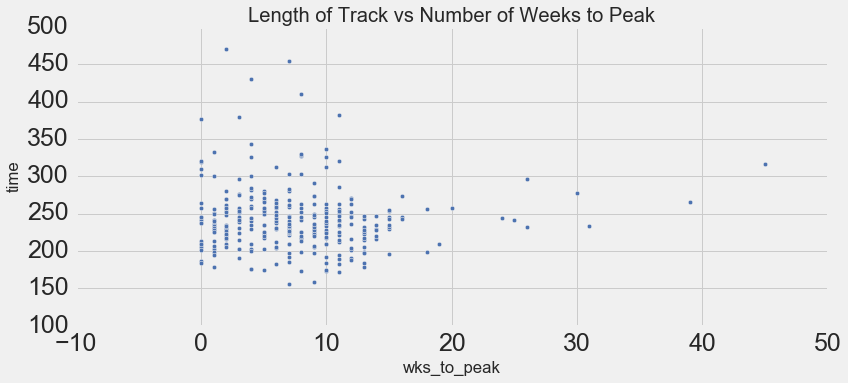

In [101]:
billboard.plot(kind='scatter',x='wks_to_peak',y='time',fontsize=25,title='Length of Track vs Number of Weeks to Peak',figsize=(12,5))
plt.show()

## There does not seem to be a relationship between the length of track and the number of weeks from entry to peak.

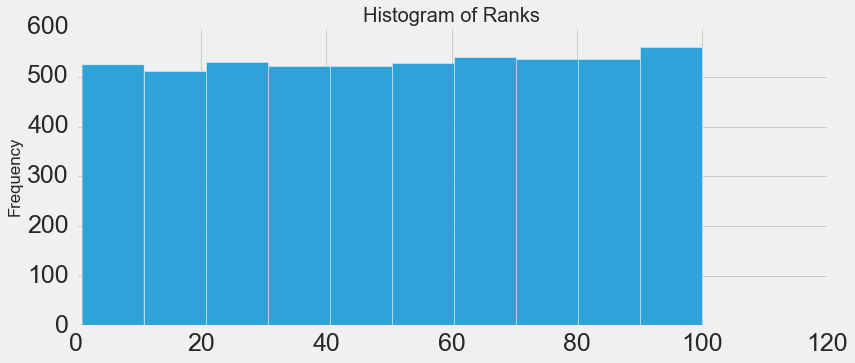

In [163]:
billboard_long['rank'].plot(kind='hist',fontsize=25,title='Histogram of Ranks',figsize=(12,5))
plt.show()

## As expected the histogram of the total rankings is nearly flat. 

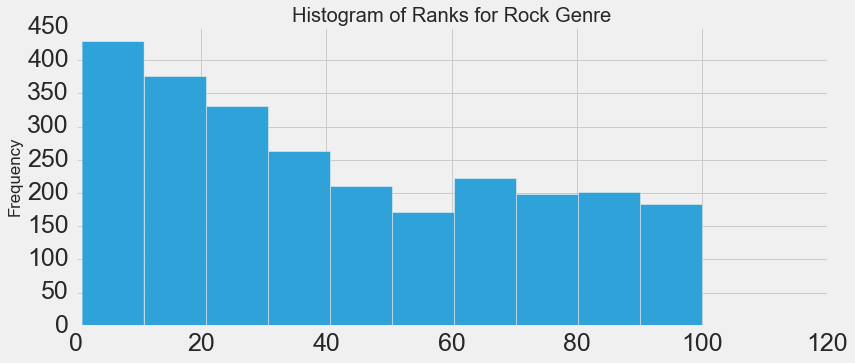

In [162]:
billboard_long[billboard_long.genre == "Rock"]['rank'].plot(kind='hist',fontsize=25,title='Histogram of Ranks for Rock Genre',figsize=(12,5))
plt.show()

## Most of the low ranks are from Rock.

## Step 4: Create a Problem Statement.

##### Having explored the data, come up with a problem statement for this data set. You can feel free to introduce data from any other source to support your problem statement, just be sure to provide a link to the origin of the data. Once again- be creative!

## Step 5: Brainstorm your Approach.
##### In bullet-list form, provide a proposed approach for evaluating your problem statement. This can be somewhat high-level, but start to think about ways you can massage the data for maximum efficacy. 

## Step 6: Create a blog post with your code snippets and visualizations.
##### Data Science is a growing field, and the Tech industry thrives off of collaboration and sharing of knowledge. Blogging is a powerful means for pushing the needle forward in our field. Using your blogging platform of choice, create a post describing each of the 5 steps above. Rather than writing a procedural text, imagine you're describing the data, visualizations, and conclusions you've arrived at to your peers. Aim for a minimum of 500 words. 

## BONUS: The Content Managers working for the Podcast Publishing Company have recognized you as a thought leader in your field. They've asked you to pen a white paper (minimum 500 words) on the subject of 'What It Means To Have Clean Data'. This will be an opinion piece read by a wide audience, so be sure to back up your statements with real world examples or scenarios.

##### Hint: To get started, look around on the internet for articles, blog posts, papers, youtube videos, podcasts, reddit discussions, anything that will help you understand the challenges and implications of dealing with big data. This should be a personal reflection on everything you've learned this week, and the learning goals that have been set out for you going forward. 

In [ ]:
plt.style.use('fivethirtyeight')

fig = plt.figure(figsize=(12,8))

axes = fig.gca()

axes.hist(rank_list, 100, facecolor='darkred', normed=1)